Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [2]:
#loading the dataset into Pandas dataframe
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [3]:
#Number of rows & Columns in the dataset

wine_dataset.shape

(1599, 12)

In [4]:
#First 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#check the null values
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data Analysis and Visualization

In [6]:
#stastical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


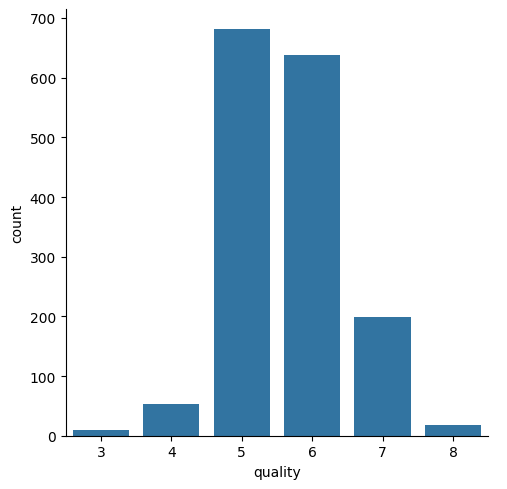

In [7]:
#Number of values for each quality

sns.catplot(x='quality', data=wine_dataset,kind='count')


<Axes: xlabel='quality', ylabel='volatile acidity'>

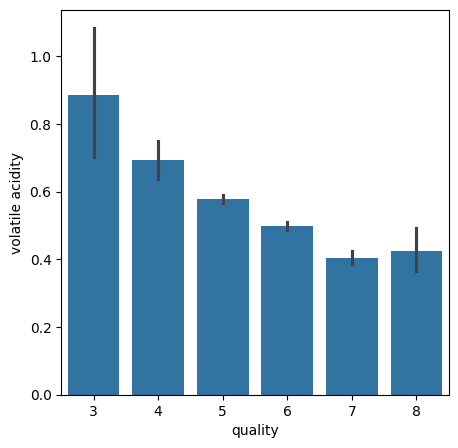

In [8]:
#volatile acidity vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'volatile acidity',data=wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

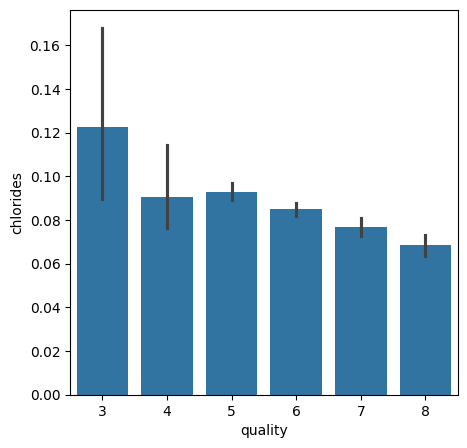

In [10]:
#chlorides vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'chlorides',data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

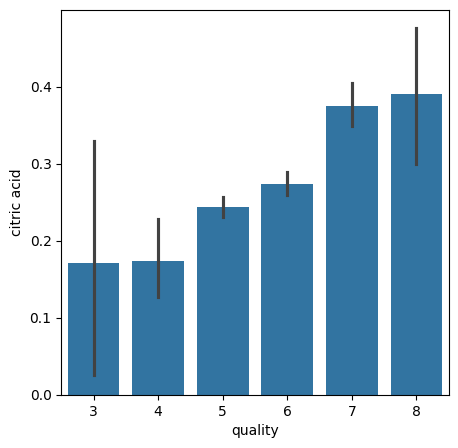

In [11]:
#citric  acidity vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'citric acid',data=wine_dataset)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

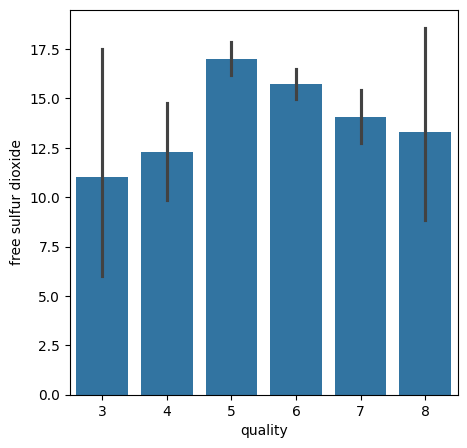

In [13]:
# free sulfur dioxide vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'free sulfur dioxide',data=wine_dataset)

Correlation

1. Positive Correlation
2. Negative Correlation

In [14]:
correlation = wine_dataset.corr()

<Axes: >

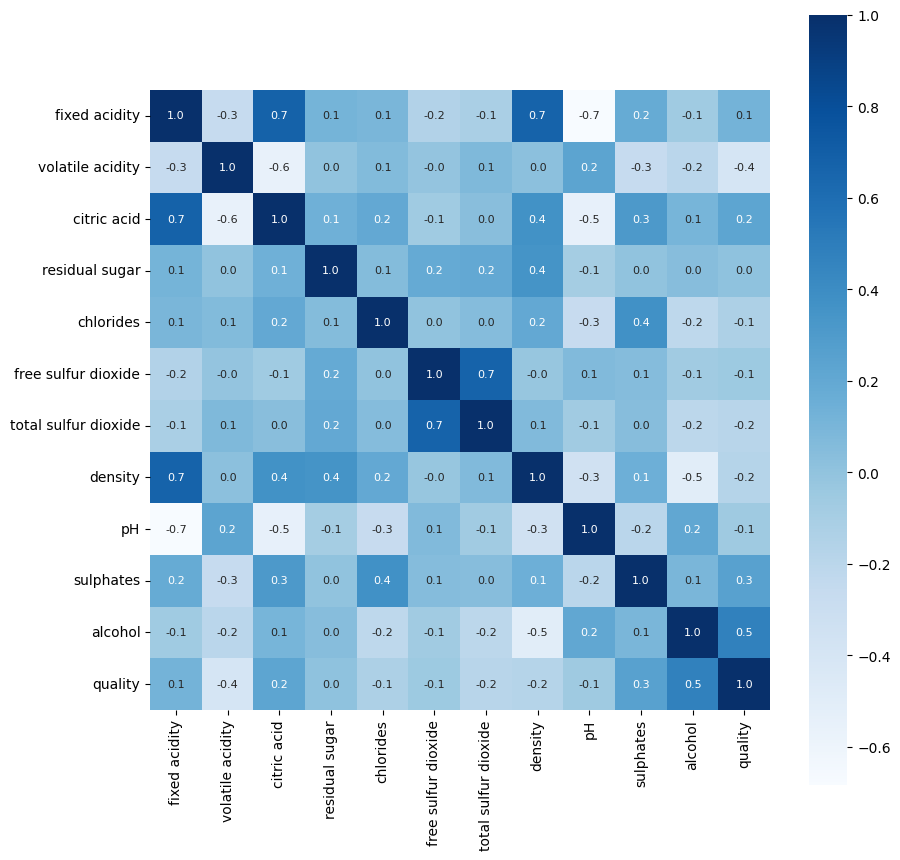

In [16]:
#Constructing a heatmap to understand the correaltion between the columns

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap ='Blues')

Data Preprocessing



In [17]:
#sepearate the data and lable

X = wine_dataset.drop('quality',axis = 1)

In [18]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

Lable Binarization

In [19]:
Y = wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [20]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & Test Split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


Model training

Random forest Classifier

In [24]:
 model = RandomForestClassifier()

In [25]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [28]:
#Accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [29]:
print("Accuracy score ",test_data_accuracy )

Accuracy score  0.921875


Building a Predictive System

In [30]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

#changing the input dtaa to numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the lable for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
